In [1]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
des=pd.read_csv('final_scraped.csv')
des.dropna(inplace=True)

In [2]:
import matplotlib.pyplot as plt

In [3]:
def text_process(mess):
    import string
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [4]:
from nltk.stem import WordNetLemmatizer  
wordnet_lemmatizer=WordNetLemmatizer()
des['Description'].apply(lambda x: wordnet_lemmatizer.lemmatize(x))
des['Description'].apply(text_process)
des['Description'].replace('^.*:\s*(.*)', r'\1', regex=True)

0        The journey to Arunachal, North East India beg...
1        //goo.gl/Frwci2 If you have any other query fe...
2        I had the chance to fly out to Bali with my wh...
3                                                      ...
4        Travel blogger, Nikki Vargas, of The Pin the M...
5        In this video I explored North East India, sta...
6        Lisbon very quickly became one of my favourite...
7        Welcome to Peru! This essential travel guide w...
8        so finally the vlog is up . this is just a bri...
9        //bit.ly/top-travel-cards-2019 _Click "Show Mo...
10                                                     ...
11                                                     ...
12       My wife and I traveled to 17 countries in 200 ...
13       //youtu.be/Xdya8eym9nM Huge thank you to Ali, ...
14       With your trip just ahead, it's time to learn ...
15       Come along on a week in Paris with me! I meant...
16       //bit.ly/guida-viaggiare-gratis ▽▽ Espandi la .

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


In [6]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(des['Description'])

In [7]:
vids_bow = bow_transformer.transform(des['Description'])

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(vids_bow)


In [9]:
vids_tfidf = tfidf_transformer.transform(vids_bow)

In [10]:
from sklearn.model_selection import train_test_split
X=vids_tfidf
y=des['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.naive_bayes import MultinomialNB
vid_model = MultinomialNB().fit(X_train,y_train)

In [11]:
pred=vid_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))
classificationReport=(classification_report(y_test,pred))


               precision    recall  f1-score   support

          Art       0.84      0.72      0.77       555
         Food       0.69      0.89      0.77       578
      History       0.84      0.73      0.78       588
Manufacturing       0.86      0.78      0.82       585
      Science       0.78      0.76      0.77       564
       Travel       0.78      0.85      0.81       548

    micro avg       0.79      0.79      0.79      3418
    macro avg       0.80      0.79      0.79      3418
 weighted avg       0.80      0.79      0.79      3418



In [13]:
vid_model.score(X_train,y_train)

0.9553493039006647

In [14]:
vid_model.score(X_test,y_test)

0.7881802223522528

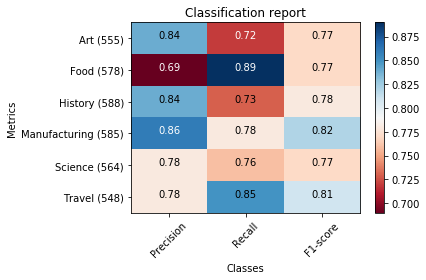

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:-4]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()


def main():

    sampleClassificationReport =(classification_report(y_test,pred))

    plot_classification_report(sampleClassificationReport)
    plt.show()
    plt.close()


if __name__ == '__main__':
    main()